## Keşifçi Veri Analizi | Becerileri Pekiştirme

Aşağıda ihtiyacımız doğrultusunda kullanacağımız kütüphaneleri yükleyelim.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

Veri çerçevemizi bulunduğumuz dizinden yükleyelim ve bir veri çerçevesi haline getirerek df değişkenine atayalım. (pd.read_csv(...csv))

In [2]:
df = pd.read_csv("iris.csv")

Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

In [5]:
print(df.head(5))

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.

In [15]:
df.shape

(150, 6)

Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

Standart sapma ve ortalama değerlerden çıkarımda bulunarak hangi değişkenlerin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.

In [67]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width,total.length
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,9.601333
std,0.828066,0.435866,1.765298,0.762238,2.520040
min,4.300000,2.000000,1.000000,0.100000,5.400000
25%,5.100000,2.800000,1.600000,0.300000,6.725000
50%,5.800000,3.000000,4.350000,1.300000,10.100000
75%,6.400000,3.300000,5.100000,1.800000,11.600000
max,7.900000,4.400000,6.900000,2.500000,14.600000


In [69]:
#varyansı en küçük olan değerler sepal.width'tir


Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğunu gözlemleyelim.

In [70]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
total.length    0
dtype: int64

Sayısal değişkenler arasında korelasyon olup olmadığını göstermek için korelasyon matrisi çizdirelim. Korelasyon katsayıları hakkında fikir yürütelim.

En güçlü pozitif ilişki hangi iki değişken arasındadır?

In [30]:
df.corr()

,sepal.length,sepal.width,petal.length,petal.width,total.length
sepal.length,1.000000,-0.117570,0.871754,0.817941,0.939259
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,-0.338757
petal.length,0.871754,-0.428440,1.000000,0.962865,0.986956
petal.width,0.817941,-0.366126,0.962865,1.000000,0.943260
total.length,0.939259,-0.338757,0.986956,0.943260,1.000000


In [71]:
# En güçlü pozitif ilişki petal.length ile petal.width arasındadır

Korelasyon katsayılarını daha iyi okuyabilmek için ısı haritası çizdirelim.

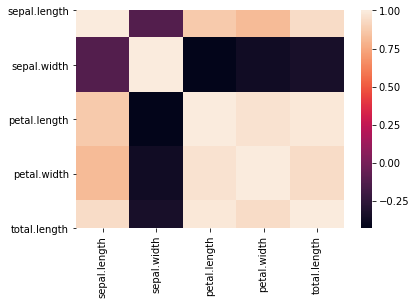

In [32]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Veri çerçevemizin hedef değişkeninin "variety" benzersiz değerlerini görüntüleyelim.

In [79]:
df["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

Veri çerçevemizin hedef değişkeninin "variety" benzersiz kaç adet değer içerdiğini görüntüleyelim.

In [80]:
df["variety"].nunique()

3

Veri çerçevesindeki sepal.width ve sepal.length değişkenlerinin sürekli olduğunu görüyoruz. Bu iki sürekli veriyi görselleştirmek için önce scatterplot kullanalım.

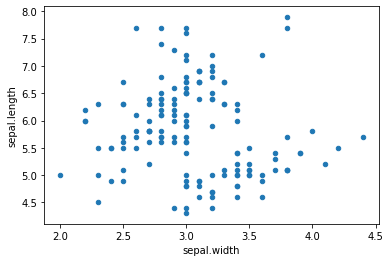

In [40]:
df.plot.scatter(x='sepal.width', y='sepal.length' )

Aynı iki veriyi daha farklı bir açıdan frekanslarıyla incelemek için jointplot kullanarak görselleştirelim. 

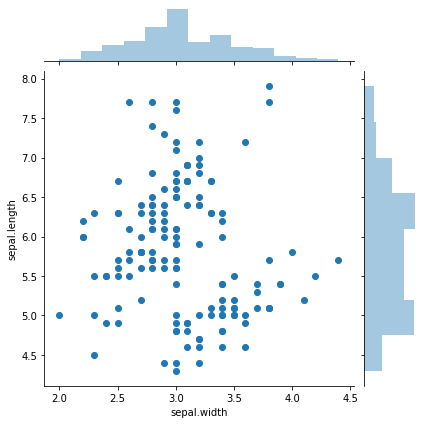

In [49]:
p = sns.jointplot(data=df,x='sepal.width', y='sepal.length')

Aynı iki veriyi scatterplot ile tekrardan görselleştirelim fakat bu sefer "variety" parametresi ile hedef değişkenine göre kırdıralım. 

3 farklı renk arasında sepal değişkenleriyle bir kümeleme yapılabilir mi? Ne kadar ayırt edilebilir bunun üzerine düşünelim.

In [50]:
import matplotlib.pyplot as plt

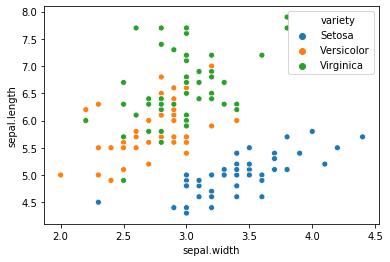

In [54]:
ax = sns.scatterplot(x="sepal.width", y="sepal.length", hue="variety" ,data=df)

value_counts() fonksiyonu ile veri çerçevemizin ne kadar dengeli dağıldığını sorgulayalım. 

Keman grafiği çizdirerek sepal.width değişkeninin dağılımını inceleyin. 

Söz konusu dağılım bizim için ne ifade ediyor, normal bir dağılım olduğunu söyleyebilir miyiz?

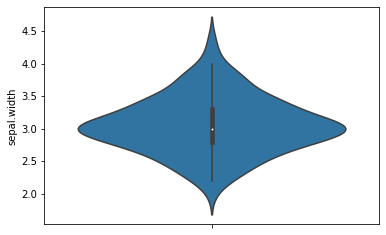

In [81]:
sns.violinplot(y = "sepal.width", data = df);

Daha iyi anlayabilmek için sepal.width üzerine bir distplot çizdirelim.

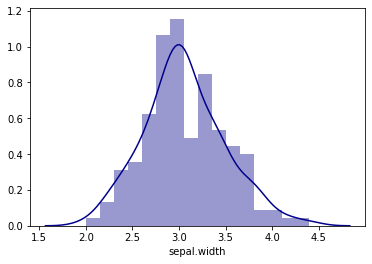

In [82]:
sns.distplot(df["sepal.width"], bins=16, color="darkblue");

Üç çiçek türü için üç farklı keman grafiğini sepal.length değişkeninin dağılımı üzerine tek bir satır ile görselleştirelim.

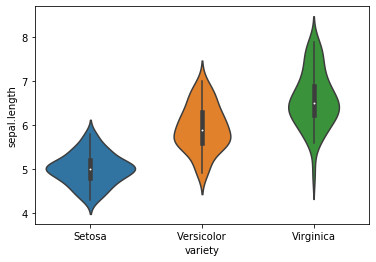

In [85]:
sns.violinplot(x = "variety", y = "sepal.length", data = df);

Hangi çiçek türünden kaçar adet gözlem barındırıyor veri çerçevemiz?

50 x 3 olduğunu ve dengeli olduğunu value_counts ile zaten görmüştük, ancak bunu görsel olarak ifade etmek için sns.countplot() fonksiyonuna variety parametresini vereilm.

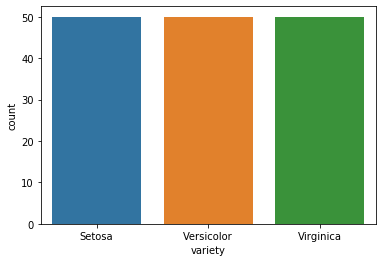

In [60]:
ax = sns.countplot(x="variety", data=df)

sepal.length ve sepal.width değişkenlerini sns.jointplot ile görselleştirelim, dağılımı ve dağılımın frekansı yüksek olduğu bölgelerini inceleyelim.

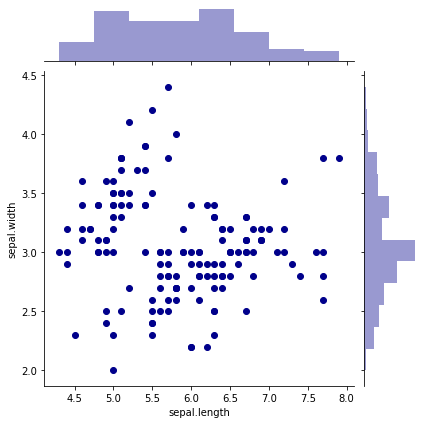

In [86]:
sns.jointplot(x = "sepal.length", y = "sepal.width", data = df, color="darkblue");

Bir önceki hücrede yapmış olduğumuz görselleştirmeye kind = "kde" parametresini ekleyelim. Böylelikle dağılımın noktalı gösterimden çıkıp yoğunluk odaklı bir görselleştirmeye dönüştüğünü görmüş olacağız.

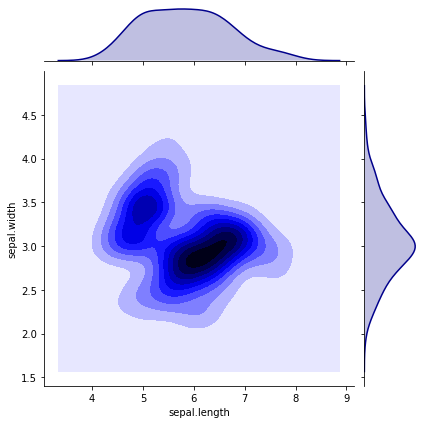

In [87]:
sns.jointplot(x = "sepal.length", y = "sepal.width",kind="kde", data = df, color="darkblue");

scatterplot ile petal.length ve petal.width değişkenlerinin dağılımlarını çizdirelim.

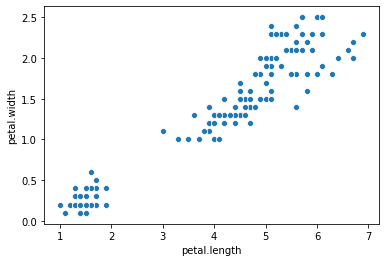

In [90]:
sns.scatterplot(x = "petal.length", y = "petal.width", data = df);

Aynı görselleştirmeye hue = "variety" parametresini ekleyerek 3. bir boyut verelim.

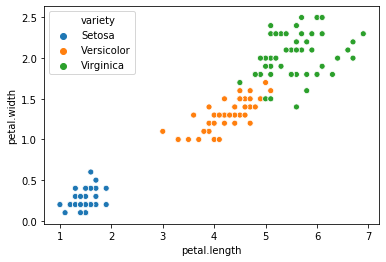

In [91]:
sns.scatterplot(x = "petal.length", y = "petal.width", hue="variety", data = df);

sns.lmplot() görselleştirmesini petal.length ve petal.width değişkenleriyle implemente edelim. Petal length ile petal width arasında ne tür bir ilişki var ve bu ilişki güçlü müdür? sorusunu yanıtlayalım.

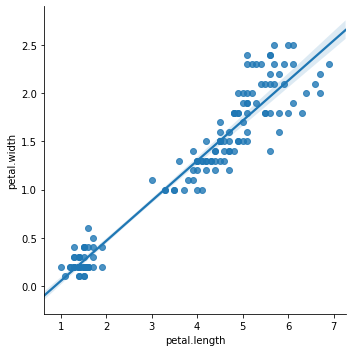

In [92]:
sns.lmplot(x="petal.length", y="petal.width", data=df)

Bu sorunun yanıtını pekiştirmek için iki değişken arasında korelasyon katsayısını yazdıralım. 

In [78]:
df.corr()["petal.length"]["petal.width"]

0.9628654314027955

Petal Length ile Sepal Length değerlerini toplayarak yeni bir total length özniteliği oluşturalım.

In [18]:
df['total.length'] = df['petal.length'] + df['sepal.length']
print(df.head())

   sepal.length  sepal.width  petal.length  petal.width variety  total.length
0           5.1          3.5           1.4          0.2  Setosa           6.5
1           4.9          3.0           1.4          0.2  Setosa           6.3
2           4.7          3.2           1.3          0.2  Setosa           6.0
3           4.6          3.1           1.5          0.2  Setosa           6.1
4           5.0          3.6           1.4          0.2  Setosa           6.4


total.length'in ortalama değerini yazdıralım. 

In [21]:
df['total.length'].mean()

9.601333333333338

total.length'in standart sapma değerini yazdıralım.

In [22]:
df['total.length'].std()

2.5200401260964997

sepal.length'in maksimum değerini yazdıralım.

In [72]:
df['sepal.length'].max()

7.9

sepal.length'i 5.5'den büyük ve türü setosa olan gözlemleri yazdıralım.

In [106]:
df[(df['variety']=='Setosa') & (df['sepal.length']>5.5)]

,sepal.length,sepal.width,petal.length,petal.width,variety,total.length
14,5.8,4.0,1.2,0.2,Setosa,7.0
15,5.7,4.4,1.5,0.4,Setosa,7.2
18,5.7,3.8,1.7,0.3,Setosa,7.4


Hedef değişkenimiz variety'e göre bir gruplama işlemi yapalım değişken değerlerimizin ortalamasını görüntüleyelim.

In [66]:
df.groupby('variety')['petal.length'].mean().head()

variety
Setosa        1.462
Versicolor    4.260
Virginica     5.552
Name: petal.length, dtype: float64

Hedef değişkenimiz variety'e göre gruplama işlemi yaparak sadece petal.length değişkenimizin standart sapma değerlerini yazdıralım. 

In [64]:
print(df.groupby("variety")["petal.length"].std().head())

variety
Setosa        0.173664
Versicolor    0.469911
Virginica     0.551895
Name: petal.length, dtype: float64


Emeğiniz, ayırdığınız vakit ve ilginiz için teşekkürler.